In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model #Open a new nueral network
from keras.layers import Input
from keras.layers import Dense, Activation, Lambda, concatenate
from keras.optimizers import SGD

In [4]:
from keras.utils import np_utils

In [5]:
from keras import backend as K

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train/255
x_test = x_test/255

Build Autoencoder and Antodecoder

In [8]:
enc_1 = Dense(100, activation = 'sigmoid')
enc_2 = Dense(2, activation = 'sigmoid')

dec_2 = Dense(100, activation = 'sigmoid' )
dec_1 = Dense(784, activation = 'sigmoid' )

In [9]:
x = Input(shape = (784, ))

In [10]:
enc_x = enc_1(x)
h = enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)

In [11]:
autoencoder = Model(x, x_reconstructed)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(loss = 'kullback_leibler_divergence', optimizer = 'Nadam')

In [13]:
autoencoder.fit(x_train, x_train, batch_size = 32, epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 22s 373us/step - loss: -21.2619
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: -22.0460
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: -22.0490
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: -22.0498
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: -22.0500
Epoch 6/10
60000/60000 [==============================] - 10s 166us/step - loss: -22.0501
Epoch 7/10
60000/60000 [==============================] - 10s 161us/step - loss: -22.0501
Epoch 8/10
60000/60000 [==============================] - 10s 174us/step - loss: -22.0501
Epoch 9/10
60000/60000 [==============================] - 9s 158us/step - loss: -22.0501
Epoch 10/10
60000/60000 [==============================] - 11s 190us/step - loss: -22.0501


In [14]:
Encoder = Model(x, h)
Encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [15]:
h_input = Input(shape = (2, ))

Decoder = Model(h_input, dec_1(dec_2(h_input)))

Decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [24]:
idx = np.random.randint(x_train.shape[0])
print("The ", idx, "th data is")
print(Encoder.predict(x_train[idx: idx+1]))

The  41869 th data is
[[0.9999814 0.9999782]]


In [25]:
idices = np.random.randint(x_test.shape[0], size = 1000)

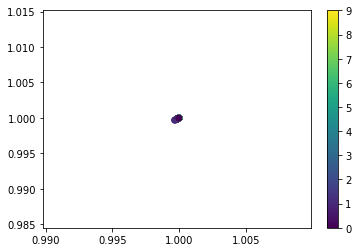

In [27]:
latents = Encoder.predict(x_test[idices])
plt.scatter(latents[: , 0], latents[:, 1], c=y_test[idices])
plt.colorbar()
plt.show()

In [28]:
n = 15
digit_size = 28

figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [29]:
for i, yi in enumerate(grid_x) :
    for j, xi in enumerate(grid_y) :
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size, 
              j * digit_size: (j+1) * digit_size] = digit

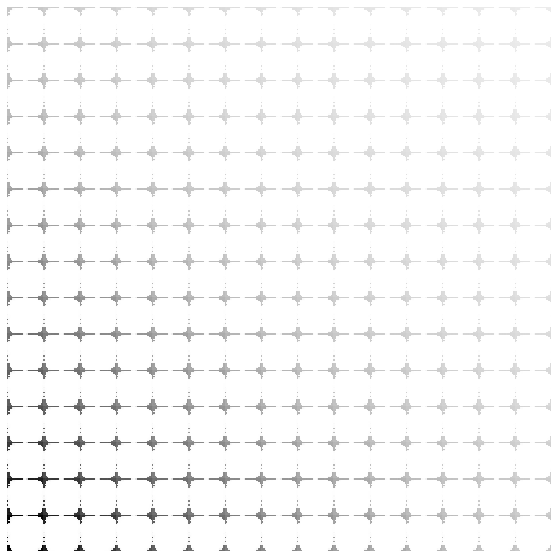

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="Greys_r")
plt.axis("off")
plt.show()

VAE

In [31]:
Enc_1 = Dense(100, activation = 'sigmoid')

Enc_mean = Dense(2)
Enc_log_var = Dense(2)

Dec_2 = Dense(100, activation = 'sigmoid')
Dec_1 = Dense(784, activation = 'sigmoid')

In [33]:
x = Input(shape=(784 ,))
Enc_x = Enc_1(x)

z_mean = Enc_mean(Enc_x)
z_log_var = Enc_log_var(Enc_x)

In [34]:
def sampling(args) :
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2, ), mean = 0, stddev = 1)
    return z_mean + K.exp(z_log_var / 2)*epsilon

In [37]:
z = Lambda(sampling, output_shape=(2, ))([z_mean, z_log_var])

In [38]:
Dec_x = Dec_2(z)
x_reconstructed = Dec_1(Dec_x)

In [39]:
VAE = Model(x, x_reconstructed)
VAE.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 100)          78500       input_3[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 2)            202         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2)            202         dense_5[0][0]                    
____________________________________________________________________________________________

In [45]:
from keras import metrics

In [46]:
def vae_loss(x, x_recon) :
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    
    return recovery_loss + kl_loss

In [47]:
VAE.compile(loss = vae_loss, optimizer = "Nadam")

In [48]:
VAE.fit(x_train, x_train, batch_size = 32, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 188.6891
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 177.9890
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 171.2111
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 166.2199
Epoch 5/10
60000/60000 [==============================] - 12s 206us/step - loss: 163.3029
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 160.7678
Epoch 7/10
60000/60000 [==============================] - 12s 198us/step - loss: 158.7467
Epoch 8/10
60000/60000 [==============================] - 11s 184us/step - loss: 157.1225
Epoch 9/10
60000/60000 [==============================] - 8s 141us/step - loss: 155.8654
Epoch 10/10
60000/60000 [==============================] - 10s 169us/step - loss: 154.6972
